In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
from matplotlib.ticker import FormatStrFormatter
import opto_util as opto
mpl.style.use('classic')
%matplotlib inline

In [2]:
plt.rcParams.update({
    'font.sans-serif': 'arial',
    'font.family': 'sans-serif'
})

In [3]:
full_df=pd.read_csv('data/full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]

In [5]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]

Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']
Sst=standard_df[standard_df.presynapticCre=='Sst']


exc_L23_pyr=standard_df[(standard_df.post_class=='pyramidal') & (standard_df.post_layer==2)]
exc_L23_pyr=exc_L23_pyr[exc_L23_pyr.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]
exc_L23_fsi=standard_df[(standard_df.Kcluster==1) & (standard_df.post_layer==2)]
exc_L23_fsi=exc_L23_fsi[exc_L23_fsi.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]



In [6]:
Penk_L23pyr=PenkKv[(PenkKv.post_class=='pyramidal') & (PenkKv.post_layer==2)]
Penk_L23int=PenkKv[(PenkKv.post_class=='interneuron') & (PenkKv.post_layer==2)]
Penk_L23fsi=PenkKv[(PenkKv.Kcluster==1) & (PenkKv.post_layer==2)]
Penk_L23vip=Penk_L23int[Penk_L23int.Kcluster==2]
Rorb_L23pyr=Rorb[(Rorb.post_class=='pyramidal') & (Rorb.post_layer==2)]
Rorb_L23fsi=Rorb[(Rorb.Kcluster==1) & (Rorb.post_layer==2)]
Tlx3_L23pyr=Tlx3Kv[(Tlx3Kv.post_class=='pyramidal') & (Tlx3Kv.post_layer==2)]
Tlx3_L23fsi=Tlx3Kv[(Tlx3Kv.Kcluster==1) & (Tlx3Kv.post_layer==2)]
Ntsr1_L23pyr=Ntsr1[(Ntsr1.post_class=='pyramidal') & (Ntsr1.post_layer==2)]
Scnn1a_L23pyr=Scnn1a[(Scnn1a.post_class=='pyramidal') & (Scnn1a.post_layer==2)]
Sst_L23pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==2)]
Sst_L5pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==5)]


Sst_L23fsi=Sst[(Sst.Kcluster==1) & (Sst.post_layer==2)]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_class=='pyramidal') & (PvalbKv.post_layer==2)]
Pvalb_Pvalb=PvalbKv[(PvalbKv.Kcluster==1) & (PvalbKv.post_layer==2)]

In [7]:
def dress_up(ax,tick_n=4):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_locator(plt.MaxNLocator(tick_n))


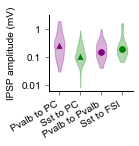

In [8]:
s=15
tick_size=4
fs=10
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100] ##exclude Pvalb to Pvalb connections within 100 microns to avoid overlap of direct stim artifact with IPSP
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
tick_labels=['Pvalb to PC', 'Sst to PC', 'Pvalb to Pvalb','Sst to FSI']
markers=['^','^','o','o',]
colors=['purple',  'green', 'purple','green']
colors2=['purple',  'green','purple', 'green']
fig, ax = plt.subplots()
master_dists=[]

for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg*-1)
    description=tick_labels[i]

    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)
    
    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    

    dress_up(ax)
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-2,-1,0,1],['0.01','0.1','1','10'])
plt.ylim([-2.2,0.5])
plt.ylabel('IPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


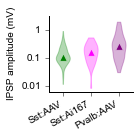

In [9]:
s=15
SstAi_L23pyr=SstAi167[(SstAi167.post_layer==2) & (SstAi167.post_class=='pyramidal')]
SstKv_L23pyr=SstKv[(SstKv.post_layer==2) & (SstKv.post_class=='pyramidal')]

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^']
colors=['green','magenta', 'purple']
colors2=['green','magenta', 'purple']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg*-1)
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)
    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    

dress_up(ax)

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-2,-1,0,1],['0.01','0.1','1','10'])

plt.ylim([-2.2,0.5])
plt.ylabel('IPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


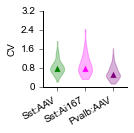

In [10]:
s=15
SstAi_L23pyr=SstAi167[(SstAi167.post_layer==2) & (SstAi167.post_class=='pyramidal')]
SstKv_L23pyr=SstKv[(SstKv.post_layer==2) & (SstKv.post_class=='pyramidal')]

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^']
colors=['green','magenta', 'purple']
colors2=['green','magenta', 'purple']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.CV)

    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)

    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    

dress_up(ax)

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

plt.ylabel('CV')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


Penk to PC
16 connections measured
Rorb to PC
245 connections measured
Tlx3 to PC
85 connections measured
Penk to FSI
28 connections measured
Rorb to FSI
24 connections measured
Tlx3 to FSI
9 connections measured


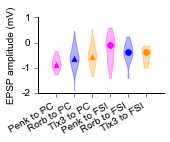

In [11]:
s=15
fs=10
tick_size=4
df_list=[Penk_L23pyr,Rorb_L23pyr, Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,  Tlx3_L23fsi]
tick_labels=['Penk to PC', 'Rorb to PC', 'Tlx3 to PC','Penk to FSI','Rorb to FSI',  'Tlx3 to FSI']
markers=['^','^','^','o','o','o']
colors=['magenta',  'blue', 'darkorange', 'magenta',  'blue', 'darkorange',]
fig, ax = plt.subplots()
master_dists=[]

for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg)
    description=tick_labels[i]

    print (description)
    print (np.shape(y)[0], 'connections measured') 
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-3,-2,-1,0,1],['0.001','0.01','0.1','1','10'])

plt.ylim([-2,1])
dress_up(ax)

plt.ylabel('EPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(2.25)
fig.autofmt_xdate()


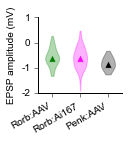

In [12]:
s=15
fs=10
tick_size=4
RorbAi_L23pyr=RorbAi167[(RorbAi167.post_layer==2) & (RorbAi167.post_class=='pyramidal')]
RorbKv_L23pyr=RorbKv[(RorbKv.post_layer==2) & (RorbKv.post_class=='pyramidal')]
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg)
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])
    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-3,-2,-1,0,1],['0.001','0.01','0.1','1','10'])
plt.ylim([-2,1])
dress_up(ax)
plt.ylabel('EPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


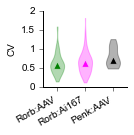

In [13]:
s=15
fs=10
tick_size=4
RorbAi_L23pyr=RorbAi167[(RorbAi167.post_layer==2) & (RorbAi167.post_class=='pyramidal')]
RorbKv_L23pyr=RorbKv[(RorbKv.post_layer==2) & (RorbKv.post_class=='pyramidal')]
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['CV'])
    y=np.array(df.CV)
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])
    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

dress_up(ax)
plt.ylabel('CV')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()
#plt.savefig('Rorb_Ai_v_AAV_CV.svg')

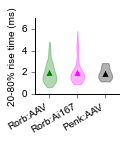

In [14]:
s=15
fs=10
tick_size=4
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg>0.1]
    y=df.rise2080
    master_dists.append(np.array(y))
    mark=markers[i]
    color=colors[i]
    ax.scatter(i+1,np.mean(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=100)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
    

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

dress_up(ax)
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


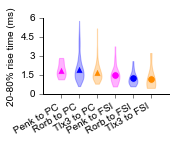

In [15]:
s=15
fs=10
tick_size=4
df_list=[Penk_L23pyr,Rorb_L23pyr, Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,  Tlx3_L23fsi]
tick_labels=['Penk to PC', 'Rorb to PC', 'Tlx3 to PC','Penk to FSI','Rorb to FSI',  'Tlx3 to FSI']
markers=['^','^','^','o','o','o']
colors=['magenta',  'blue', 'darkorange', 'magenta',  'blue', 'darkorange',]
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg>0.1]
    y=df.rise2080
    description=tick_labels[i]
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(np.array(y))
    mark=markers[i]
    color=colors[i]
    ax.scatter(i+1,np.mean(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=100)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    i+=1
    
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.ylim(0.0,6)
dress_up(ax)
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(2.25)
fig.autofmt_xdate()
#plt.savefig('EPSP_rise_short_scale.svg')

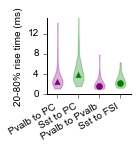

In [16]:
s=15
fs=10
tick_size=4
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100]
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
tick_labels=['Pvalb to PC', 'Sst to PC', 'Pvalb to Pvalb','Sst to FSI']
markers=['^','^','o','o',]
colors=['purple',  'green', 'purple','green']
master_dists=[]

fig, ax = plt.subplots()
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg<-0.1]
    description=tick_labels[i]
    y=df.rise2080
    
    master_dists.append(np.array(y))
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1

plt.ylim(0.0,15)
dress_up(ax)
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()



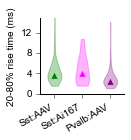

In [17]:
s=15
fs=10
tick_size=4

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^','o',]
colors=['green',  'magenta', 'purple']
master_dists=[]
fig, ax = plt.subplots()
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg<-0.1]
    y=df.rise2080
    master_dists.append(np.array(y))
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

    
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1

plt.ylim(0.0,15)
dress_up(ax)
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


In [18]:
color_dict={'Scnn1a':'blue', 'Rorb':'blue', 'Tlx3':'darkorange', 'Ntsr1':'red', 'Penk':'magenta', 'Sst':'green','Pvalb':'purple'}


SpearmanrResult(correlation=-0.7557812676309871, pvalue=4.528616272290246e-67)
SpearmanrResult(correlation=-0.5765203595980961, pvalue=1.1594341822763673e-06)


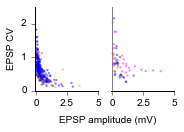

In [19]:
gskw = dict(width_ratios=[1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
x_max=5
y_max=2.5

fig = plt.figure(figsize=(2.5,1.5))
ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
df_list=[exc_L23_pyr, exc_L23_fsi]
axes=[ax0, ax1]

for df, ax in zip(df_list,axes):

    df=df[df.cnx=='excitatory'].dropna(subset=['peakOfAvg','CV'])
    print (stats.spearmanr(df.peakOfAvg, df.CV))
    ax.scatter(df.peakOfAvg, df.CV, facecolor=[color_dict[i] for i in df.presynapticCre],alpha=0.5,s=5,edgecolors='none')
    ax.set_xlim([-0.1,x_max])
    ax.set_ylim([0,y_max])
    dress_up(ax,3)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax1.plot([0,0],[0,3],ls='solid',color='grey')

ax0.set_xlabel('EPSP amplitude (mV)')
ax0.xaxis.set_label_coords(1.15, -0.3)
ax0.set_ylabel('EPSP CV')
ax1.yaxis.set_ticks_position('none')
ax1.spines['left'].set_visible(False)
ax1.axes.yaxis.set_visible(False)




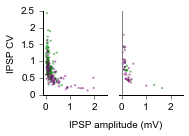

In [20]:
gskw = dict(width_ratios=[1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
fig = plt.figure(figsize=(2.5,1.5))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
axes=[ax0,ax0,ax1,ax1]
colors=['green','purple','green','purple']
df_list=[Sst_L23pyr,Pvalb_L23pyr, Sst_L23fsi, Pvalb_Pvalb]
for df, ax, color in zip(df_list,axes,colors):
    df=df[df.cnx=='inhibitory']
    ax.scatter(df.peakOfAvg*-1,df.CV,c=color,alpha=0.5,s=5,edgecolors='None')
    ax.set_xlim([-0.1,2.5])
    ax.set_ylim([0,2.5])
    dress_up(ax,5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    
    
ax1.plot([0,0],[0,3],ls='solid',color='grey')
ax0.set_xlabel('IPSP amplitude (mV)')
ax0.xaxis.set_label_coords(1.15, -0.3)
ax0.set_ylabel('IPSP CV')
ax1.yaxis.set_ticks_position('none')
ax1.spines['left'].set_visible(False)
ax1.axes.yaxis.set_visible(False)

In [21]:
L23=standard_df[standard_df.post_layer==2]
L23pyr=L23[L23.post_class=='pyramidal']
L23pyr_exc=L23pyr[L23pyr.presynapticCre.isin(['Scnn1a', 'Rorb','Tlx3','Ntsr1','Penk'])]
L23int=L23[L23.post_class=='interneuron']
L23int_exc=L23int[L23int.presynapticCre.isin(['Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1','Penk'])]
L23fsi_exc=L23int_exc[L23int_exc.Kcluster==1]

In [22]:
def low_quant(arr):
    return np.quantile(arr,0.25)
def high_quant(arr):
    return np.quantile(arr,0.75)

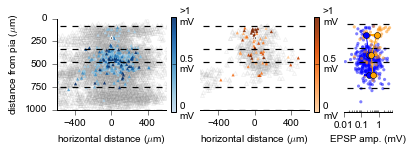

In [23]:
x_lim=[-500,500]
y_lim=[500,0]
fs=10
tick_size=5
vmax=1
vmin=0
font='arial'
size=10
mp=20

gskw = dict(width_ratios=[5,5,2], wspace=0.25)
gs = matplotlib.gridspec.GridSpec(1,3, **gskw)

fig = plt.figure(figsize=(6,1.7))

ax0=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
ax1=fig.add_subplot(gs[1], aspect='equal', adjustable='box')

df_list=[L23pyr_exc,L23fsi_exc]
map_axes=[ax0,ax1]
cm_names=['Blues','Oranges']
for df, ax, cm_name in zip(df_list,map_axes,cm_names):

    df=df.dropna(subset=['y_pia'])
    exc=df[df.cnx=='excitatory']
    exc= exc.sort_values(['peakOfAvg'], ascending=1)
    cells=exc.groupby(['exp_id', 'headstage']).toPia.mean()
    avg_post_cell=np.mean(cells)
    ax.scatter(0,avg_post_cell, marker='^', facecolor='black',s=size,zorder=2,edgecolors='white')
    nocnx=df[df.cnx=='no cnx']
    ax.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='^', edgecolors='grey')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.set_ticks([-400,0,400])
    ax.axis([-600,600,1000,0])
    full_cmp = plt.get_cmap(cm_name, 512)
    newcmp = matplotlib.colors.ListedColormap(full_cmp(np.linspace(0.25, 1, 256)))
    heat_cnxs=ax.scatter(exc.x_ap, exc.y_pia, c=exc.peakOfAvg, vmin=vmin, vmax=vmax, s=size, cmap=newcmp, alpha=0.9
                , marker='^', edgecolors='None',zorder=1)
    ax.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
    cb=fig.colorbar(heat_cnxs,ticks=[0,0.5,1], ax=ax,fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])
    cb.ax.tick_params(labelsize=10)


ax0.set_ylabel('distance from pia (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax1.axes.yaxis.set_visible(False)
ax1.spines['left'].set_visible(False)
ax2=fig.add_subplot(gs[2])

colors=['blue', 'darkorange']
colors2=['blue','orange']

min_cnx=3
bins=[50,330,480,750]

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg','y_pia'])
    df=df[df.cnx=='excitatory']
    ax2.scatter(df.peakOfAvg,df.y_pia, facecolor=color,edgecolors='none',alpha=0.5,s=10)
    binned_median=stats.binned_statistic(df.y_pia,df.peakOfAvg, bins=bins, statistic='median')[0]
    binned_up=stats.binned_statistic(df.y_pia,df.peakOfAvg,bins=bins,statistic=high_quant)[0]
    binned_low=stats.binned_statistic(df.y_pia,df.peakOfAvg,bins=bins,statistic=low_quant)[0]
    count=stats.binned_statistic(df.y_pia,df.peakOfAvg,  bins=bins, statistic='count')[0]
    thresh=count>min_cnx
    x=binned_median[thresh]
    y=opto.midPoints(bins)[thresh]
    xerr=[x-binned_low[thresh],binned_up[thresh]-x]
    ax2.errorbar(x, y, xerr=xerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1)


for ax in [ax0, ax1, ax2]:
    opto.layer_borders(ax)
    dress_up(ax)

ax2.axis([0.01,5,1000,0])
ax2.set_xscale('log')
ax2.set_xlabel('EPSP amp. (mV)', fontsize=10, fontname='arial')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.spines['left'].set_visible(False)
ax2.axes.yaxis.set_visible(False)


(77, 81)
(162, 81)


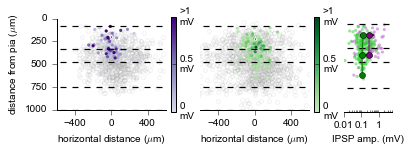

In [24]:
x_lim=[-500,500]
y_lim=[500,0]
fs=10
tick_size=5
vmax=1
vmin=0
font='arial'
size=10
mp=20

gskw = dict(width_ratios=[5,5,2], wspace=0.25)
gs = matplotlib.gridspec.GridSpec(1,3, **gskw)

fig = plt.figure(figsize=(6,1.7))

ax0=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
ax1=fig.add_subplot(gs[1], aspect='equal', adjustable='box')

df_list=[Pvalb_L23pyr,Sst_L23pyr]
map_axes=[ax0,ax1]
cm_names=['Purples','Greens']
for df, ax, cm_name in zip(df_list,map_axes,cm_names):

    df=df.dropna(subset=['y_pia'])
    inh=df[df.cnx=='inhibitory']
    print (np.shape(inh))
    inh= inh.sort_values(['peakOfAvg'], ascending=0)
    cells=inh.groupby(['exp_id', 'headstage']).toPia.mean()
    avg_post_cell=np.mean(cells)
    ax.scatter(0,avg_post_cell, marker='^', facecolor='black',s=size,zorder=2,edgecolors='white')
    nocnx=df[df.cnx=='no cnx']
    ax.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='o', edgecolors='grey')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.set_ticks([-400,0,400])
    ax.axis([-600,600,1000,0])
    full_cmp = plt.get_cmap(cm_name, 512)
    newcmp = matplotlib.colors.ListedColormap(full_cmp(np.linspace(0.25, 1, 256)))
    heat_cnxs=ax.scatter(inh.x_ap, inh.y_pia, c=inh.peakOfAvg*-1, vmin=vmin, vmax=vmax, s=size, cmap=newcmp, alpha=1
                , marker='o', edgecolors='None',zorder=1)
    ax.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
    cb=fig.colorbar(heat_cnxs,ticks=[0,0.5,1], ax=ax,fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])
    cb.ax.tick_params(labelsize=10)


ax0.set_ylabel('distance from pia (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax1.axes.yaxis.set_visible(False)
ax1.spines['left'].set_visible(False)
ax2=fig.add_subplot(gs[2])

colors=['mediumorchid','limegreen']
colors2=['purple','green']

min_cnx=3
bins=[50,330,480,750]

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg','y_pia'])
    df=df[df.cnx=='inhibitory']
    ax2.scatter(df.peakOfAvg*-1,df.y_pia, facecolor=color,edgecolors='none',alpha=0.5,s=10)
    binned_median=stats.binned_statistic(df.y_pia,df.peakOfAvg*-1, bins=bins, statistic='median')[0]
    binned_up=stats.binned_statistic(df.y_pia,df.peakOfAvg*-1,bins=bins,statistic=high_quant)[0]
    binned_low=stats.binned_statistic(df.y_pia,df.peakOfAvg*-1,bins=bins,statistic=low_quant)[0]
    count=stats.binned_statistic(df.y_pia,df.peakOfAvg*-1,  bins=bins, statistic='count')[0]
    thresh=count>min_cnx
    x=binned_median[thresh]
    y=opto.midPoints(bins)[thresh]
    xerr=[x-binned_low[thresh],binned_up[thresh]-x]
    ax2.errorbar(x, y, xerr=xerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1)


for ax in [ax0, ax1, ax2]:
    opto.layer_borders(ax)
    dress_up(ax)

ax2.axis([0.01,5,1000,0])
ax2.set_xscale('log')
ax2.set_xlabel('IPSP amp. (mV)', fontsize=10, fontname='arial')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.spines['left'].set_visible(False)
ax2.axes.yaxis.set_visible(False)


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

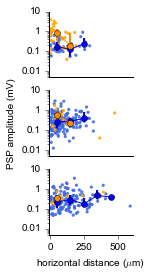

In [25]:
gskw = dict(height_ratios=[1,1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(3,1, **gskw)
mp=20
fig = plt.figure(figsize=(1.5,4))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
ax2=fig.add_subplot(gs[2])

df_list=[exc_L23_pyr, exc_L23_fsi]
colors=['royalblue', 'orange']
colors2=['blue','darkorange']
off=0
min_cnx=3
x_bins=np.arange(0,601,100)
y_bins=[50,330,480,750]
min_cnx=2

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg'])
    df=df[df.cnx=='excitatory']
    L2=df[df.y_pia<330]
    L4=df[(df.y_pia>330) & (df.y_pia<480)]
    L5=df[(df.y_pia>480)]
    ec='none'
    ax0.scatter(L2.abs_x, L2.peakOfAvg,facecolor=color,edgecolors=ec,alpha=0.9,s=10)
    ax1.scatter(L4.abs_x, L4.peakOfAvg, facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    ax2.scatter(L5.abs_x, L5.peakOfAvg, facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    for Ldf, ax in zip([L2,L4,L5],[ax0,ax1,ax2]):
        binned_median=stats.binned_statistic(Ldf.abs_x,Ldf.peakOfAvg, bins=x_bins, statistic='median')[0]
        binned_up=stats.binned_statistic(Ldf.abs_x, Ldf.peakOfAvg,bins=x_bins,statistic=high_quant)[0]
        binned_low=stats.binned_statistic(Ldf.abs_x, Ldf.peakOfAvg, bins=x_bins, statistic=low_quant)[0]
        count=stats.binned_statistic(Ldf.abs_x,Ldf.peakOfAvg,  bins=x_bins, statistic='count')[0]
        thresh=count>min_cnx
   
        y=binned_median[thresh]
        x=opto.midPoints(x_bins)[thresh]
        yerr=[y-binned_low[thresh],binned_up[thresh]-y]
        ax.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)
    
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([-10,610])
    ax.set_ylim([0.005,10])
    ax.set_yscale('log')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.axes.xaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylabel('PSP amplitude (mV)')
ax2.set_xlabel('horizontal distance (' r'$\mu$'+'m)')


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

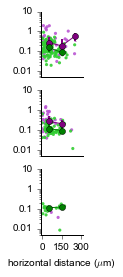

In [26]:
gskw = dict(height_ratios=[1,1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(3,1, **gskw)
mp=20
fig = plt.figure(figsize=(0.75,4))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
ax2=fig.add_subplot(gs[2])

df_list=[Pvalb_L23pyr, Sst_L23pyr]
colors=['mediumorchid', 'limegreen']
colors2=['purple','green']
off=0
min_cnx=3
x_bins=np.arange(0,601,100)
y_bins=[50,330,480,750]
min_cnx=2

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg'])
    df=df[df.cnx=='inhibitory']
    L2=df[df.y_pia<330]
    L4=df[(df.y_pia>330) & (df.y_pia<480)]
    L5=df[(df.y_pia>480)]
    ec='none'
    ax0.scatter(L2.abs_x, abs(L2.peakOfAvg),facecolor=color,edgecolors=ec,alpha=0.9,s=10)
    ax1.scatter(L4.abs_x, abs(L4.peakOfAvg), facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    ax2.scatter(L5.abs_x, abs(L5.peakOfAvg), facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    for Ldf, ax in zip([L2,L4,L5],[ax0,ax1,ax2]):
        binned_median=stats.binned_statistic(Ldf.abs_x,abs(Ldf.peakOfAvg), bins=x_bins, statistic='median')[0]
        binned_up=stats.binned_statistic(Ldf.abs_x, abs(Ldf.peakOfAvg),bins=x_bins,statistic=high_quant)[0]
        binned_low=stats.binned_statistic(Ldf.abs_x, abs(Ldf.peakOfAvg), bins=x_bins, statistic=low_quant)[0]
        count=stats.binned_statistic(Ldf.abs_x,abs(Ldf.peakOfAvg),  bins=x_bins, statistic='count')[0]
        thresh=count>min_cnx
   
        y=binned_median[thresh]
        x=opto.midPoints(x_bins)[thresh]
        yerr=[y-binned_low[thresh],binned_up[thresh]-y]
        ax.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)

        
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([-10,310])
    ax.set_ylim([0.005,10])
    ax.set_yscale('log')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.axes.xaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax2.set_xlabel('horizontal distance (' r'$\mu$'+'m)')


In [27]:
def PSP_population_params(df, cnx_call,label):
    cnxs=df[df.cnx==cnx_call]
    cnxs=cnxs.dropna(subset=['peakOfAvg'])
    median=np.median(abs(cnxs.peakOfAvg))
    mean=np.mean(abs(cnxs.peakOfAvg))
    sd=np.std(abs(cnxs.peakOfAvg))
    n=len(cnxs.peakOfAvg)
    skew=stats.skew(abs(cnxs.peakOfAvg))
    CV=np.nanmean(cnxs.CV)
    rise_sub=cnxs[abs(cnxs.peakOfAvg)>0.1]
    rise_mean=np.nanmean(rise_sub.rise2080)
    cnxs=cnxs.dropna(subset=['abs_x','y_pia'])
    XspearmanR,XspearmanP=stats.spearmanr(cnxs.abs_x,cnxs.peakOfAvg)
    YspearmanR,YspearmanP=stats.spearmanr(cnxs.y_pia,cnxs.peakOfAvg)
    PSP_dict={'connection class':label,'amp. median (mV)':median,'amp. mean (mV)':mean,
              'amp. sd (mV)':sd,'amp. skew':skew,'n':n,'CV':CV,'20-80% rise (ms)':rise_mean}
    return PSP_dict
def PSP_dist_corr(df,cnx_call,label):
    cnxs=df[df.cnx==cnx_call]
    cnxs=cnxs.dropna(subset=['peakOfAvg','y_pia','abs_x'])
    amps=cnxs.peakOfAvg
    x=cnxs.abs_x
    y=cnxs.y_pia
    XspearmanR,XspearmanP=stats.spearmanr(x,amps)
    YspearmanR,YspearmanP=stats.spearmanr(y,amps)
    n=len(amps)
    corr_dict={'connection class':label,'horizontal Spearman R':XspearmanR,'horizontal Spearman p':XspearmanP,
             'presyn. pia Spearman R':YspearmanR,'presyn. pia Spearman p':YspearmanP,'n':n}
    return corr_dict

In [28]:
cnx_classes=['Penk to L2/3 PC', 'Rorb to L2/3 PC',  'Tlx3 to L2/3 PC', 'Ntsr1 to L2/3 PC',
             'Penk to L2/3 FSI','Rorb to L2/3 FSI', 'Tlx3 to L2/3 FSI',
             'Pvalb to L2/3 PC', 'Sst to L2/3 PC', 'Pvalb to L2/3 FSI', 'Sst to L2/3 FSI']
df_list=[Penk_L23pyr,Rorb_L23pyr,Tlx3_L23pyr,Ntsr1_L23pyr,Penk_L23fsi,Rorb_L23fsi,Tlx3_L23fsi,
         Pvalb_L23pyr, Sst_L23pyr, Pvalb_Pvalb, Sst_L23fsi]
calls=['excitatory','excitatory','excitatory','excitatory','excitatory','excitatory','excitatory',
      'inhibitory','inhibitory','inhibitory','inhibitory']
rows=[]
corr_rows=[]
for df,label,call in zip(df_list, cnx_classes,calls):
    PSP_dict=PSP_population_params(df,call,label)
    corr_dict=PSP_dist_corr(df,call,label)
    rows.append(PSP_dict)
    corr_rows.append(corr_dict)
PSP_df=pd.DataFrame.from_dict(rows)
corr_df=pd.DataFrame.from_dict(corr_rows)
PSP_df.to_csv('outputs/PSP_props.csv')
corr_df.to_csv('outputs/PSP_dist_corr.csv')
PSP_df

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_17623/1692640933.py:11: RuntimeWarning: Mean of empty slice
  rise_mean=np.nanmean(rise_sub.rise2080)


,connection class,amp. median (mV),amp. mean (mV),amp. sd (mV),amp. skew,n,CV,20-80% rise (ms)
0,Penk to L2/3 PC,0.146486,0.174925,0.104434,1.297460,16,0.797779,1.918923
1,Rorb to L2/3 PC,0.250468,0.383338,0.416290,3.023495,245,0.633395,2.014566
2,Tlx3 to L2/3 PC,0.304859,0.455875,0.513689,3.201072,85,0.538308,1.723459
3,Ntsr1 to L2/3 PC,0.092858,0.092858,0.000000,0.000000,1,1.085600,NaN
4,Penk to L2/3 FSI,0.811742,1.002615,0.985359,1.407496,28,0.896457,1.524869
5,Rorb to L2/3 FSI,0.404168,0.547148,0.382470,1.303851,24,0.754512,1.231490
6,Tlx3 to L2/3 FSI,0.439667,0.396489,0.217038,0.179792,9,0.749269,1.159951
7,Pvalb to L2/3 PC,0.272244,0.406684,0.445330,1.969450,77,0.584943,3.035219
8,Sst to L2/3 PC,0.114605,0.159684,0.127290,2.350467,162,0.849414,4.512205
9,Pvalb to L2/3 FSI,0.155071,0.205219,0.179378,2.608240,34,0.862443,2.029468


In [29]:
corr_df

,connection class,horizontal Spearman R,horizontal Spearman p,presyn. pia Spearman R,presyn. pia Spearman p,n
0,Penk to L2/3 PC,-0.526471,0.036167,-0.505882,0.045582,16
1,Rorb to L2/3 PC,0.079746,0.214513,0.029029,0.651834,244
2,Tlx3 to L2/3 PC,0.184835,0.090363,-0.012859,0.907015,85
3,Ntsr1 to L2/3 PC,NaN,NaN,NaN,NaN,1
4,Penk to L2/3 FSI,-0.351396,0.066712,-0.443350,0.018128,28
5,Rorb to L2/3 FSI,-0.274783,0.193781,-0.054783,0.799308,24
6,Tlx3 to L2/3 FSI,0.716667,0.029818,0.566667,0.111633,9
7,Pvalb to L2/3 PC,0.075556,0.513697,0.170461,0.138288,77
8,Sst to L2/3 PC,0.185061,0.018393,0.044322,0.575454,162
9,Pvalb to L2/3 FSI,-0.073186,0.680829,0.043545,0.806824,34


In [30]:
sub=corr_df.dropna()
horiz_bh= sm.stats.multipletests(sub['horizontal Spearman p'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pia_bh=sm.stats.multipletests(sub['presyn. pia Spearman p'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
sub['horizontal BH corrected p']=horiz_bh
sub['pia BH corrected p']=pia_bh
sub

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_17623/1878958519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['horizontal BH corrected p']=horiz_bh
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_17623/1878958519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pia BH corrected p']=pia_bh


,connection class,horizontal Spearman R,horizontal Spearman p,presyn. pia Spearman R,presyn. pia Spearman p,n,horizontal BH corrected p,pia BH corrected p
0,Penk to L2/3 PC,-0.526471,0.036167,-0.505882,0.045582,16,0.120555,0.227908
1,Rorb to L2/3 PC,0.079746,0.214513,0.029029,0.651834,244,0.268141,0.896471
2,Tlx3 to L2/3 PC,0.184835,0.090363,-0.012859,0.907015,85,0.167667,0.907015
4,Penk to L2/3 FSI,-0.351396,0.066712,-0.443350,0.018128,28,0.166779,0.181276
5,Rorb to L2/3 FSI,-0.274783,0.193781,-0.054783,0.799308,24,0.268141,0.896471
6,Tlx3 to L2/3 FSI,0.716667,0.029818,0.566667,0.111633,9,0.120555,0.345720
7,Pvalb to L2/3 PC,0.075556,0.513697,0.170461,0.138288,77,0.570775,0.345720
8,Sst to L2/3 PC,0.185061,0.018393,0.044322,0.575454,162,0.120555,0.896471
9,Pvalb to L2/3 FSI,-0.073186,0.680829,0.043545,0.806824,34,0.680829,0.896471
10,Sst to L2/3 FSI,0.399381,0.100600,0.126935,0.615727,18,0.167667,0.896471


In [31]:
sub.to_csv('outputs/PSP_dist_corr_BH.csv')

In [32]:
cnx_classes=['Penk to L2/3 PC', 'Rorb to L2/3 PC',  'Tlx3 to L2/3 PC','Penk to L2/3 FSI','Rorb to L2/3 FSI',
            'Tlx3 to L2/3 FSI']
measures=['amp. median', 'amp. mean', 'amp. sd', 'skew', 'CV', 'rise2080']
df_list=[Penk_L23pyr,Rorb_L23pyr,Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,Tlx3_L23fsi]
i=0
amp_master=[]
rise_master=[]
summary_table=np.zeros([len(cnx_classes),len(measures)])
for df in df_list:
    exc_cnxs=df[df.cnx=='excitatory']
    exc_cnxs=exc_cnxs.dropna(subset=['peakOfAvg'])
    class_name=cnx_classes[i]
    
    median=np.median(exc_cnxs.peakOfAvg)
    mean=np.mean(exc_cnxs.peakOfAvg)
    sd=np.std(exc_cnxs.peakOfAvg)
    n=len(exc_cnxs.peakOfAvg)
    skew=stats.skew(exc_cnxs.peakOfAvg)
    CV=np.nanmean(exc_cnxs.CV)
    rise=np.nanmean(exc_cnxs.rise2080)
    summary_table[i,:]=np.array([median, mean, sd, skew,CV,rise])
    amp_master.append(np.array(exc_cnxs.peakOfAvg))
    exc_cnxs_rise=exc_cnxs.dropna(subset=['rise2080'])
    rise_master.append(np.array(exc_cnxs_rise.rise2080))
    i+=1

In [33]:
summary_table

array([[0.14648558, 0.17492532, 0.10443425, 1.29745982, 0.79777858,
        1.90934975],
       [0.25046769, 0.38333844, 0.41629013, 3.0234951 , 0.63339455,
        1.98709483],
       [0.30485916, 0.45587488, 0.51368922, 3.20107168, 0.53830818,
        1.81302675],
       [0.81174159, 1.0026152 , 0.98535925, 1.40749633, 0.89645704,
        1.50738839],
       [0.40416814, 0.54714776, 0.38246963, 1.30385141, 0.7545124 ,
        1.23340415],
       [0.43966651, 0.39648871, 0.21703757, 0.17979232, 0.74926864,
        1.15995129]])

In [34]:
stats.kruskal(np.array(amp_master[0]),np.array(amp_master[1]),np.array(amp_master[2]))

KruskalResult(statistic=9.468106895411525, pvalue=0.00879076581446018)

In [35]:
stats.kruskal(np.array(rise_master[0]),np.array(rise_master[1]),np.array(rise_master[2]))

KruskalResult(statistic=2.478265188284695, pvalue=0.28963534040160543)

In [36]:
args=[l for l in amp_master]
stats.kruskal(*args)

KruskalResult(statistic=29.257936648730862, pvalue=2.0636327469436655e-05)

In [37]:
import scikit_posthocs as sp
def Cohens_d(pop1,pop2):
    u1=np.mean(pop1)
    u2=np.mean(pop2)
    s=np.std(np.append(pop1,pop2))
    s1=np.std(pop1)
    s2=np.std(pop2)
    d=(u2-u1)/((0.5*(s1**2+s2**2)))**0.5
    return d

In [38]:
out_array=np.zeros([6,6])
y_array=range(6)
x_array=range(6)
i=0
for y in y_array:
    x_array=range(0,6)
    for x in x_array:
        #print (cnx_classes[y], cnx_classes[x])
        d=Cohens_d(args[x],args[y])
        #print (d)
        out_array[x,y]=d
    i+=1

In [39]:
exc_dunn=sp.posthoc_dunn(args,p_adjust='fdr_bh')
exc_dunn

,1,2,3,4,5,6
1,1.000000,0.028032,0.011027,0.000208,0.000771,0.036764
2,0.028032,1.000000,0.264882,0.001488,0.012435,0.409824
3,0.011027,0.264882,1.000000,0.028032,0.092089,0.690034
4,0.000208,0.001488,0.028032,1.000000,0.696673,0.409824
5,0.000771,0.012435,0.092089,0.696673,1.000000,0.544623
6,0.036764,0.409824,0.690034,0.409824,0.544623,1.000000


([<matplotlib.axis.YTick at 0x7ffbda1217f0>,
 [Text(0, 0.5, 'Penk to L2/3 PC'),
  Text(0, 1.5, 'Rorb to L2/3 PC'),
  Text(0, 2.5, 'Tlx3 to L2/3 PC'),
  Text(0, 3.5, 'Penk to L2/3 FSI'),
  Text(0, 4.5, 'Rorb to L2/3 FSI'),
  Text(0, 5.5, 'Tlx3 to L2/3 FSI')])

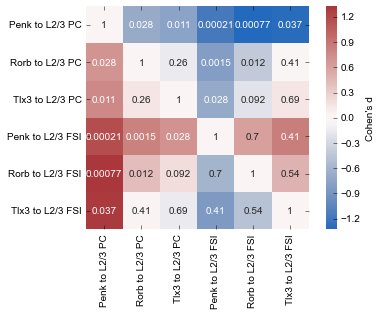

In [40]:
##excitatory amp comparison table
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=exc_dunn, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='horizontal')
#plt.savefig('exc_amp_comparison_table.svg')

KruskalResult(statistic=35.290930963181836, pvalue=1.3163029875176739e-06)


([<matplotlib.axis.YTick at 0x7ffbda43e220>,
 [Text(0, 0.5, 'Penk to L2/3 PC'),
  Text(0, 1.5, 'Rorb to L2/3 PC'),
  Text(0, 2.5, 'Tlx3 to L2/3 PC'),
  Text(0, 3.5, 'Penk to L2/3 FSI'),
  Text(0, 4.5, 'Rorb to L2/3 FSI'),
  Text(0, 5.5, 'Tlx3 to L2/3 FSI')])

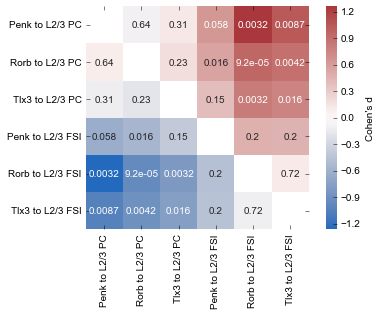

In [41]:
args=[l for l in rise_master]
print (stats.kruskal(*args))
out_array=np.zeros([6,6])
y_array=range(6)
x_array=range(6)
i=0
for y in y_array:
    x_array=range(0,6)
    for x in x_array:
        #print cnx_classes[y], cnx_classes[x]
        d=Cohens_d(args[x],args[y])
        #print d
        out_array[x,y]=d
    i+=1
    
out_array[out_array == 0] ='nan'
exc_dunn_rise=sp.posthoc_dunn(args,p_adjust='fdr_bh')
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=exc_dunn_rise, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='horizontal')
#plt.savefig('exc_rise_comparison_table.svg')

In [42]:
cnx_classes=['Pvalb to L2/3 PC', 'Sst to L2/3 PC',  'Pvalb to L2/3 Pvalb','Sst to L2/3 FSI']
measures=['amp. median', 'amp. mean', 'amp. sd', 'skew', 'CV', 'rise2080']
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100]
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
i=0
amp_master=[]
rise_master=[]
summary_table=np.zeros([len(cnx_classes),len(measures)])
for df in df_list:
    inh_cnxs=df[df.cnx=='inhibitory']
    inh_cnxs=inh_cnxs.dropna(subset=['peakOfAvg'])
    class_name=cnx_classes[i]
    
    median=np.median(inh_cnxs.peakOfAvg*-1)
    mean=np.mean(inh_cnxs.peakOfAvg*-1)
    sd=np.std(inh_cnxs.peakOfAvg*-1)
    n=len(inh_cnxs.peakOfAvg)
    skew=stats.skew(inh_cnxs.peakOfAvg*-1)
    CV=np.nanmean(inh_cnxs.CV)
    rise=np.nanmean(inh_cnxs.rise2080)
    print (class_name, median, mean ,sd, skew,CV,rise)
    summary_table[i,:]=np.array([median, mean, sd, skew,CV,rise])
    amp_master.append(np.array(inh_cnxs.peakOfAvg*-1))
    inh_cnxs_rise=inh_cnxs.dropna(subset=['rise2080'])
    rise_master.append(np.array(inh_cnxs_rise.rise2080))
    i+=1

Pvalb to L2/3 PC 0.27224353 0.40668365346753255 0.44533027803224023 1.96944969542753 0.5849427918181819 2.9804102412987015
Sst to L2/3 PC 0.11460514 0.15968361426543207 0.12729008641993256 2.3504668055929354 0.8494139724691359 4.027286719135803
Pvalb to L2/3 Pvalb 0.15507073999999998 0.2209873559642857 0.18831560270146208 2.5472037579825466 0.7616326335714287 2.1017170464285715
Sst to L2/3 FSI 0.194480255 0.33799078427777773 0.4207139294598545 2.3841976129283746 0.751002473888889 2.726183394444445


In [43]:
args=[l for l in amp_master]
stats.kruskal(*args)

KruskalResult(statistic=30.18137868393046, pvalue=1.2639814212761591e-06)

In [44]:
args=[l for l in rise_master]
stats.kruskal(*args)

KruskalResult(statistic=41.793097339190126, pvalue=4.438931766124997e-09)

In [45]:
out_array=np.zeros([4,4])
y_array=range(4)
x_array=range(4)
i=0
for y in y_array:
    x_array=range(0,4)
    for x in x_array:
        
        d=Cohens_d(args[x],args[y])
        out_array[x,y]=d
    i+=1

In [46]:
inh_dunn=sp.posthoc_dunn(args,p_adjust='fdr_bh')
inh_dunn

,1,2,3,4
1,1.000000,5.612595e-04,4.776047e-03,0.771579
2,0.000561,1.000000e+00,3.941899e-08,0.025462
3,0.004776,3.941899e-08,1.000000e+00,0.059018
4,0.771579,2.546237e-02,5.901849e-02,1.000000


([<matplotlib.axis.YTick at 0x7ffbda5106d0>,
 [Text(0, 0.5, 'Pvalb to L2/3 PC'),
  Text(0, 1.5, 'Sst to L2/3 PC'),
  Text(0, 2.5, 'Pvalb to L2/3 Pvalb'),
  Text(0, 3.5, 'Sst to L2/3 FSI')])

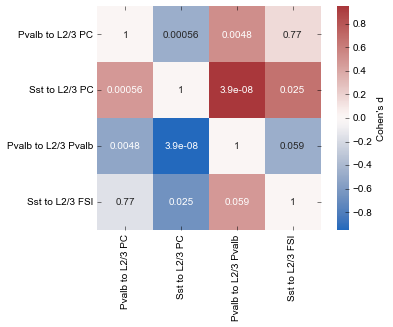

In [47]:

sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=inh_dunn, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='horizontal')
#plt.savefig('inh_amp_comparison_table.svg')

([<matplotlib.axis.YTick at 0x7ffbdb0a82e0>,
 [Text(0, 0.5, 'Pvalb to L2/3 PC'),
  Text(0, 1.5, 'Sst to L2/3 PC'),
  Text(0, 2.5, 'Pvalb to L2/3 Pvalb'),
  Text(0, 3.5, 'Sst to L2/3 FSI')])

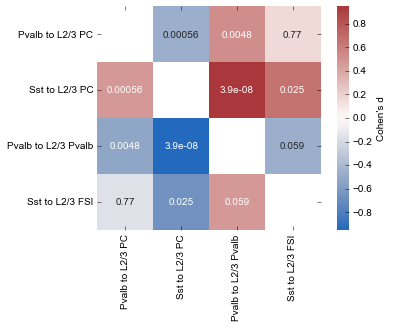

In [48]:
args=[l for l in rise_master]
stats.kruskal(*args)
out_array=np.zeros([4,4])
y_array=range(4)
x_array=range(4)
i=0
for y in y_array:
    x_array=range(0,4)
    for x in x_array:
        
        d=Cohens_d(args[x],args[y])
        
        out_array[x,y]=d
    i+=1
    
out_array[out_array == 0] ='nan'
inh_dunn_rise=sp.posthoc_dunn(args,p_adjust='fdr_bh')
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=inh_dunn_rise, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='horizontal')
#plt.savefig('inh_rise_comparison_table.svg')

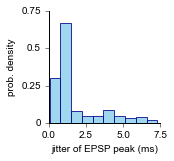

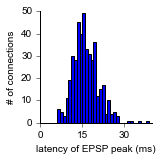

In [49]:
df=standard_df
df=df[df.cnx=='excitatory']
df=df.dropna(subset=['jitter'])
fig, ax= plt.subplots()
ax.hist(df.jitter,edgecolor='darkblue',facecolor='skyblue',alpha=0.8,density=True)
ax.set_xlabel('jitter of EPSP peak (ms)')
ax.set_ylabel('prob. density')
ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.axes.xaxis.set_visible(True)

fig.set_figheight(2)
fig.set_figwidth(2)
#plt.savefig('EPSP_jitter_hist.svg')
plt.show()

fig, ax = plt.subplots()
bins=np.arange(0,45,1)
ax.hist(df.timeOfPeak,bins=bins)
ax.set_xlabel('latency of EPSP peak (ms)')
ax.set_ylabel('# of connections')
ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.axes.xaxis.set_visible(True)
ax.set_xlim(0,40)
fig.set_figheight(2)
fig.set_figwidth(2)
#plt.savefig('EPSP_latency_hist.svg')
plt.show()
